In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
#from pymc3 import *

# 2022 version: https://colab.research.google.com/drive/1PPFwE4GUzsr707s3mPhGRs7-TYlHxND2?usp=sharing


# Expectation

## Example 1 (expected value of of Bernoulli)

Verify that the formula for the mean of bernoulli distribution and standard deviations with Monte Carlo simulations
\begin{equation}
E[Y] = q
\end{equation}

In [ ]:
# define function to draw samples anand compute mean and standard deviation of bernoulli random variable
def mean_bern(q):
  sample = np.random.choice([0,1],500,p=[1-q,q])
  return np.mean(sample)

Text(0, 0.5, 'average')

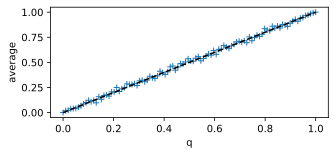

In [ ]:


q_range = np.linspace(0,1,100) # generates one hundred evenly spaced numbers between 0 and 1
means = np.zeros(len(q_range))

# for j in range(len(q_range)):
#   means[j] = mean_bern(q_range[j])
# another way to do this is
means = [mean_bern(q_range[j]) for j in range(len(q_range))]

# make the plot
fig,ax = plt.subplots(figsize=(5,2))
# plot q_range vs. means
ax.plot(q_range,means,"+")
ax.plot(q_range,q_range,"k--")
ax.set_xlabel("q")
ax.set_ylabel("average")

## Example 3 (test score data)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/KidIQ/data/kidiq.csv")
y = df.kid_score.values
x = df.mom_hs.values

np.mean(y[x==0])

77.54838709677419

In [ ]:


#
print(np.mean(y[x==0]))
print(np.mean(y))


77.54838709677419
86.79723502304148


## Example 4 (properties of expectation)

In [ ]:
num_samples = 1000000
x = np.random.choice([1,2,3,4],num_samples,p=[1/2,1/8,1/8,1/4])
y = x*np.random.geometric(1/2,num_samples)

In [ ]:
print("linearity ------------------")
print(np.mean(x+y))
print(np.mean(x)+np.mean(y))

print("independence ---------------")
print(np.mean(x*y))
print(np.mean(x)*np.mean(y))

linearity ------------------
6.375583
6.375583000000001
independence ---------------
12.250462
9.032384719032


In [ ]:
y

array([6, 8, 1, ..., 8, 3, 3])

In [ ]:
np.mean(x)
ys = np.unique(y)

x_conds = []
for i in range(len(ys)):
  ysi = ys[i]
  x_conds.append(np.mean(x[y==ysi]))
x_conds = np.array(x_conds)


In [ ]:
num_samples = 1000000
x = np.random.choice([1,2,3,4],num_samples,p=[1/2,1/8,1/8,1/4])
y = x*np.random.geometric(1/2,num_samples)
print("tower property -------------")
ys = np.unique(y)

# CORRECTED
# note that np.mean(x[y==ysi]) = E[X|Y=ysi]
# we want to compute E[X] = E[E[X|Y=ysi]] = sum_yE[X|Y=ysi]*P(Y=ysi)
# so we use P(Y=ysi) approx len(y[y==ysi])/len(y)
x_conds = np.array([np.mean(x[y==ysi])*len(y[y==ysi])/len(y) for ysi in ys]) # this gives E[X|Y=y] for each y value
#
print(np.sum(x_conds))
print(np.mean(x))

tower property -------------
2.1241259999999995
2.124126


# Binomial distribution

In [ ]:
np.random.binomial(100,0.4,1000);

def mybinomial(N,q):
  sm = 0
  for i in range(N):
    sm = sm + np.random.choice([0,1],p=[q,1-q])
  return sm

NameError: ignored

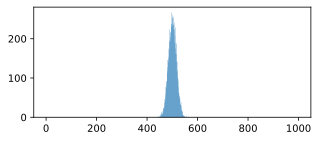

In [ ]:
N = 1000
y = np.random.binomial(N,0.5,10000);

fig,axs = plt.subplots(figsize=(5,2))
plt.hist(y,bins=range(1,N));
ax.set_xlim([0,100])

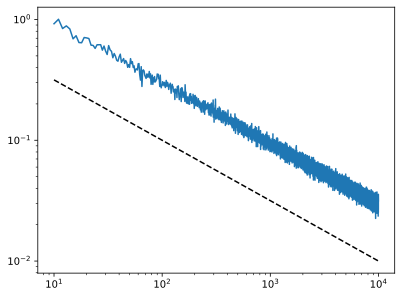

In [ ]:
# here we plot the coefficient of variation (CV) as a function of N
# for a binomial random variable
N_range = range(10,10000)
cv = np.zeros(len(N_range))
q = 0.1
for j in range(len(N_range)):
  y = np.random.binomial(N_range[j],q,100)
  cv[j] = np.sqrt(np.var(y))/np.mean(y)
plt.plot(N_range,cv)
plt.loglog(N_range,1/np.array(N_range)**(1/2),"k--")


This is an instance where something called a log-log plot is useful. The idea is that when plotting something like
\begin{equation}
y = x^a
\end{equation}
it helpful to measure distance on an exponential scale. This means that one unit on the x and y axis corresponds to a 10 fold increase.

We would get the same plot by taking the log of both sides (I'll use base 10 but any base will do)
\begin{equation}
\log(y) = \log(x^a) = a\log(x).
\end{equation}
If we plot $\log(y)$ vs. $\log(x)$ this appears as a straight line with slope $a$. If we replace the values on the axis with $y$ and $x$ (instead of their logs) we get the log-log plot.  

## Example 7 (Vote share)

In [ ]:
q= 0.51 # this is the fraction of people who support one candidate
N = 1000 # the number of poeple who note
n_monte = 10000 # the number of monte carlo simulations to run

# now we "simulate" n_monte elections
# so M is a list of the number of people who voted for one candidate in each election
M = np.random.binomial(N,q,n_monte)

# we divide everything in the list by N to get the vote share
phi = M/N

# here are two ways to do the same thing
print(len(phi[(phi >= 0.51+0.01) |(phi <= 0.51-0.01)])/len(phi))
print(len(phi[abs(phi-0.51)>0.01])/len(phi))

0.546
0.546


# Continuous variables

## Example 8 (conditioning with continuous random variables)

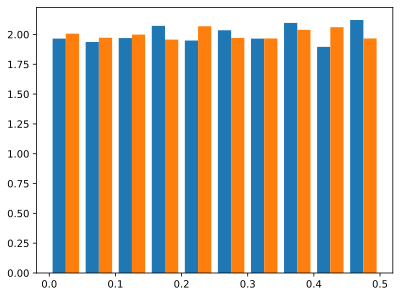

In [ ]:
y = np.random.uniform(0,1,10000) # generate samples from Uniform(0,1)

# now to condition on the event that y<1/2,
# we simply take all the values which are less than 1/2
y_cond = y[y<1/2]

# we will compare this to the unifoorm distribution on [0,1/2]
y2 = np.random.uniform(0,1/2,10000) # generate samples from Uniform(0,1/2)


plt.hist([y[y<1/2],y2],density=True);

## Example 9 (Exponential model)

In [ ]:
np.mean(np.random.exponential(1/2,1000))

0.5155223191656211

1.7949182057472015
0.9666423996266497


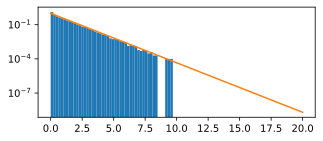

In [ ]:
n  = 50000
x = np.random.choice([0,1],n,p=[0.9,0.1])
T = np.array([np.random.exponential(1/(xi*10+(1-xi))) for xi in x])
print(np.mean(T**2))
print(np.var(T))

fig,ax = plt.subplots(figsize=(5,2))
ax.hist(T,bins = np.linspace(0,20,100),density=True);

t_range = np.linspace(0,20,100)
ax.semilogy(t_range,np.exp(-t_range))

# Normal model

## Example 4 (Conditioning with Normal distribution)




We use Bayes' theorem
\begin{equation}
P(Y>\mu - \sigma|Y<\mu + \sigma) = \frac{P(Y>\mu - \sigma,Y<\mu + \sigma)}{P(Y<\mu + \sigma)}
\end{equation}
The numerator can be visualized as the area under the curve between $\pm$ a standard deviation. We know this to be about $0.64$. The denominator is the area less than $+$ a standard deviation.

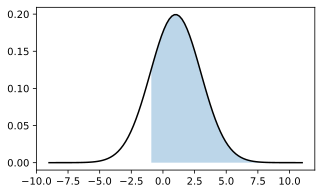

In [ ]:
def gauss(m,s,y_range):
  return 1/np.sqrt(2*np.pi*s**2)*np.exp(-(y_range-m)**2/(2*s**2))

# fig,ax = plt.subplots(figsize=(5,3))
# m = 1
# s = 2
# y_range = np.linspace(m-5*s,m+5*s,100)
# ax.plot(y_range,gauss(m,s,y_range),"k-")
# y_range = y_range[y_range>m-s]
# ax.fill_between(y_range,np.zeros(len(y_range)),gauss(m,s,y_range),alpha=0.3)

# y_range = np.linspace(m-5*s,m+5*s,100)
# y_range = y_range[y_range<m+s]
#ax.fill_between(y_range,np.zeros(len(y_range)),gauss(m,s,y_range),alpha=0.3)

In [ ]:
68/(68+13+2)

0.8192771084337349

In [ ]:
mu = 0
sigma = 1
y = np.random.normal(mu,sigma,10000)

len(y[(y>mu-sigma)&(y<mu+sigma)])/len(y[(y<mu+sigma)])

0.8122380553227159

In [ ]:
len(y[(y>mu-s)&(y<m+s)])/len(y[(y<m+s)])

0.04079065588499551